In [100]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [101]:
df_credit = pd.read_csv("german_credit.csv")

In [102]:
df_credit.shape

(1000, 21)

In [103]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [104]:
df_credit.isnull().count()

default                       1000
account_check_status          1000
duration_in_month             1000
credit_history                1000
purpose                       1000
credit_amount                 1000
savings                       1000
present_emp_since             1000
installment_as_income_perc    1000
personal_status_sex           1000
other_debtors                 1000
present_res_since             1000
property                      1000
age                           1000
other_installment_plans       1000
housing                       1000
credits_this_bank             1000
job                           1000
people_under_maintenance      1000
telephone                     1000
foreign_worker                1000
dtype: int64

In [105]:
df_credit.isna().count()

default                       1000
account_check_status          1000
duration_in_month             1000
credit_history                1000
purpose                       1000
credit_amount                 1000
savings                       1000
present_emp_since             1000
installment_as_income_perc    1000
personal_status_sex           1000
other_debtors                 1000
present_res_since             1000
property                      1000
age                           1000
other_installment_plans       1000
housing                       1000
credits_this_bank             1000
job                           1000
people_under_maintenance      1000
telephone                     1000
foreign_worker                1000
dtype: int64

In [106]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [107]:
#selecting 50% of data randomly
df_credit_half = df_credit.sample(frac=0.5,random_state=1)

In [108]:
# x = df_credit.drop('default', axis=1)
# y = df_credit['default']

In [109]:
# Split X and y into training and test set in 50:50 ratio
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=1)



In [110]:
df_credit_half.shape

(500, 21)

In [111]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [112]:
# Print Shape of model data

In [113]:
df_credit_half2=pd.get_dummies(df_credit_half)

In [114]:
df_credit_half2.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
507,1,15,6850,1,2,34,1,2,1,0,...,1,0,1,0,0,0,0,1,0,1
818,0,36,15857,2,3,43,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1
452,0,12,2759,2,4,34,2,1,0,0,...,1,0,0,1,0,0,1,0,0,1
368,1,36,3446,4,2,42,1,2,0,1,...,1,0,0,1,0,0,1,0,0,1
242,1,48,4605,3,4,24,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [115]:
df_credit_half2.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.274729,0.209066,0.014660,0.009692,-0.044395,-0.042880,-0.008988,0.121093,0.249902,...,-0.186883,0.088420,0.091278,-0.023391,0.017606,-0.056820,0.004295,-0.004295,-0.094948,0.094948
duration_in_month,0.274729,1.000000,0.628854,0.029655,0.073515,-0.017726,0.053460,0.006393,0.042592,0.081637,...,-0.112055,-0.010151,0.097352,0.096702,-0.051075,-0.176165,-0.145770,0.145770,-0.150361,0.150361
credit_amount,0.209066,0.628854,1.000000,-0.329122,0.019531,0.002779,0.064565,0.017159,0.100662,0.042935,...,-0.124286,0.026281,0.257811,-0.059604,0.007527,-0.150505,-0.235923,0.235923,-0.036255,0.036255
installment_as_income_perc,0.014660,0.029655,-0.329122,1.000000,0.071117,0.080264,0.024295,-0.060136,-0.073207,0.040431,...,0.065393,-0.132311,0.051939,0.065740,-0.110511,-0.075959,-0.035454,0.035454,-0.144436,0.144436
present_res_since,0.009692,0.073515,0.019531,0.071117,1.000000,0.259530,0.113783,0.031045,-0.053606,0.143309,...,-0.339321,0.223558,0.034533,0.003175,-0.087665,0.003693,-0.124425,0.124425,-0.020605,0.020605
age,-0.044395,-0.017726,0.002779,0.080264,0.259530,1.000000,0.158247,0.143692,-0.077574,-0.015334,...,0.050861,-0.246057,0.120675,-0.100880,0.025739,0.007130,-0.149404,0.149404,0.017018,-0.017018
credits_this_bank,-0.042880,0.053460,0.064565,0.024295,0.113783,0.158247,1.000000,0.104409,-0.031960,0.016432,...,0.030111,-0.102999,0.034425,-0.005376,0.036280,-0.037944,-0.133521,0.133521,-0.000725,0.000725
people_under_maintenance,-0.008988,0.006393,0.017159,-0.060136,0.031045,0.143692,0.104409,1.000000,-0.044293,0.021248,...,0.028514,-0.107508,-0.028703,-0.125604,0.013048,0.168369,0.054977,-0.054977,0.148438,-0.148438
account_check_status_0 <= ... < 200 DM,0.121093,0.042592,0.100662,-0.073207,-0.053606,-0.077574,-0.031960,-0.044293,1.000000,-0.375496,...,0.019176,-0.029301,0.012401,-0.072304,0.101239,0.033173,-0.000363,0.000363,-0.066459,0.066459
account_check_status_< 0 DM,0.249902,0.081637,0.042935,0.040431,0.143309,-0.015334,0.016432,0.021248,-0.375496,1.000000,...,-0.142758,0.120528,-0.008229,-0.027593,-0.001320,0.040370,0.033771,-0.033771,0.109622,-0.109622


### Drop the original variables which are converted to dummy

In [116]:
df_credit_half2.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

In [117]:
df_credit_half2 = df_credit_half2.drop(['account_check_status_0 <= ... < 200 DM',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_.. >= 1000 DM ',
       'savings_... < 100 DM', 'savings_100 <= ... < 500 DM',
       'savings_500 <= ... < 1000 DM ', 'savings_unknown/ no savings account',
       'present_emp_since_.. >= 7 years', 'present_emp_since_... < 1 year ',
       'present_emp_since_1 <= ... < 4 years',
       'present_emp_since_4 <= ... < 7 years', 'present_emp_since_unemployed',
       'personal_status_sex_female : divorced/separated/married',
       'personal_status_sex_male : divorced/separated',
       'personal_status_sex_male : married/widowed',
       'personal_status_sex_male : single', 'other_debtors_co-applicant',
       'other_debtors_guarantor', 'other_debtors_none',
       'property_if not A121 : building society savings agreement/ life insurance',
       'property_if not A121/A122 : car or other, not in attribute 6',
       'property_real estate', 'property_unknown / no property',
       'other_installment_plans_bank', 'other_installment_plans_none',
       'other_installment_plans_stores', 'housing_for free', 'housing_own',
       'housing_rent',
       'job_management/ self-employed/ highly qualified employee/ officer',
       'job_skilled employee / official',
       'job_unemployed/ unskilled - non-resident', 'job_unskilled - resident',
       'telephone_none', 'telephone_yes, registered under the customers name ',
       'foreign_worker_no', 'foreign_worker_yes'], axis=1)

In [118]:
df_credit_half2.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
507,1,15,6850,1,2,34,1,2
818,0,36,15857,2,3,43,1,1
452,0,12,2759,2,4,34,2,1
368,1,36,3446,4,2,42,1,2
242,1,48,4605,3,4,24,2,2


In [119]:
df_credit_half2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 507 to 30
Data columns (total 8 columns):
default                       500 non-null int64
duration_in_month             500 non-null int64
credit_amount                 500 non-null int64
installment_as_income_perc    500 non-null int64
present_res_since             500 non-null int64
age                           500 non-null int64
credits_this_bank             500 non-null int64
people_under_maintenance      500 non-null int64
dtypes: int64(8)
memory usage: 35.2 KB


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [120]:
x=df_credit_half2.drop('default', axis=1)
y=df_credit_half2['default']

In [121]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)




### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [123]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=2, criterion="entropy", random_state=9999)

In [124]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [125]:
y_predict=rf_model.predict(x_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [126]:
from sklearn import metrics
rf_acc=metrics.accuracy_score(y_test,y_predict)
print(rf_acc)

0.7866666666666666


In [127]:
from sklearn.metrics import confusion_matrix
#confusion matrix
conf_mat = confusion_matrix(y_test,y_predict)
print(conf_mat)


[[100   6]
 [ 26  18]]


In [128]:
#Classification report
rf_cr=metrics.classification_report(y_test,y_predict)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       106
           1       0.75      0.41      0.53        44

   micro avg       0.79      0.79      0.79       150
   macro avg       0.77      0.68      0.70       150
weighted avg       0.78      0.79      0.76       150



### Q6 Show the list of the features importance( 1 Marks)

In [129]:
rf_model.feature_importances_

array([0.19729532, 0.32358166, 0.07931086, 0.07344053, 0.24545823,
       0.05024444, 0.03066896])

In [130]:
# print(sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_)))

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [131]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [132]:
# Use below values
num_folds = 10
seed = 77

In [133]:
#Validate the Random Forest model build above using k fold

In [134]:
kfold = model_selection.KFold(n_splits=10, random_state=1)

In [135]:
#Calculate Mean score

In [136]:
acc_scores_cv = cross_val_score(rf_model, x, y, cv=kfold, scoring='accuracy')
print("Accuracy: %0.02f (+/- %0.2f)" % (acc_scores_cv.mean(), acc_scores_cv.std() ))

Accuracy: 0.73 (+/- 0.06)


In [137]:
# Calculate score standard deviation using std()

In [138]:
print(acc_scores_cv.std())

0.056603886792339624


# Q8 Print the confusion matrix( 1 Marks)

In [139]:
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(rf_model,x,y,cv=kfold)

In [140]:
#confusion matrix
conf_mat_cv = confusion_matrix(y,y_pred_cv)
print(conf_mat_cv)



[[320  36]
 [101  43]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [141]:
#Classification report
rf_cr_cv=metrics.classification_report(y,y_pred_cv)
print(rf_cr_cv)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       356
           1       0.54      0.30      0.39       144

   micro avg       0.73      0.73      0.73       500
   macro avg       0.65      0.60      0.60       500
weighted avg       0.70      0.73      0.70       500



In [142]:
# print("% of correct prediction is ")

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [143]:
#Hint: Use roc_curve

In [144]:
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc


In [145]:
probas1_ = rf_model.fit(x_train, y_train).predict_proba(x_test)

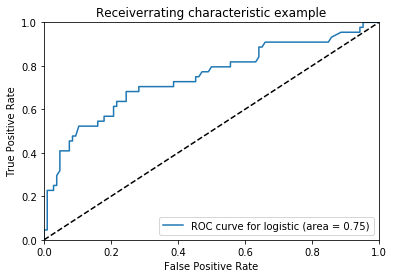

In [146]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [147]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.746677


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [148]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []